Path to dataset files: /kaggle/input/banglore-house-price-prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
area_type_counts = df['area_type'].value_counts()
area_type_counts

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
# Correct usage of df.drop() to remove multiple columns:
columns_to_drop = ['availability', 'society', 'balcony', 'area_type']  # Create a list of columns to drop
df.drop(columns=columns_to_drop, axis=1, inplace=True)  # Use the 'columns' argument to specify the columns
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Data Cleaning


In [ ]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'bath' is the column with missing values

# Calculate the median of the 'bath' column (excluding missing values)
median_bath = df['bath'].median()

# Fill the missing values in the 'bath' column with the median
df['bath'].fillna(median_bath, inplace=True)

# (Optional) Display the updated DataFrame to verify the changes
print(df.head())

                   location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'size' is the column with text data

# Calculate the mode of the 'size' column
mode_size = df['size'].mode()[0]  # [0] to get the actual mode value

# Fill missing values in the 'size' column with the mode
df['size'].fillna(mode_size, inplace=True)

# Display the updated DataFrame (optional)
print(df.head())

                   location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00


In [ ]:
df.isnull().sum()

,0
location,1
size,0
total_sqft,0
bath,0
price,0


In [ ]:
# Drop rows with null values in the 'location' column
df.dropna(subset=['location'], inplace=True)

# Display the shape of the updated DataFrame (optional)
print(df.shape)

(13319, 5)


In [ ]:
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# Feature Engineering
df['bhk'] = df['size'].str.split().str.get(0).astype(int)
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df.drop(columns=['size'], inplace=True)

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except ValueError:
    return False
  return True


In [ ]:
df[~df['total_sqft'].apply(is_float)].head(10)


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2


In [ ]:
def convert_sqrt_to_num(x):
  token = x.split('-')
  if len(token) == 2:
    return (float(token[0]) + float(token[1]))/2
  try:
    return float(x)
  except:
    return None



In [ ]:
dfc=df.copy()
dfc['total_sqft'] = dfc['total_sqft'].apply(convert_sqrt_to_num)
dfc.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


OUTLIER DETECTION

In [ ]:
df2=dfc.copy()
df2['price_per_sqft'] = df2['price'] *100000 / df2['total_sqft']
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

,location
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Whitefield,1
Sector 1 HSR Layout,1
Bhoganhalli,1


In [ ]:
len(location_stats[location_stats<=10])


1064

In [ ]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

,location
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
sapthagiri Layout,1
sarjapura main road,1
kamanahalli main road,1


In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Gunjur Palya,10
Sadashiva Nagar,10
Basapura,10
Dodsworth Layout,10
1st Block Koramangala,10
...,...
sapthagiri Layout,1
sarjapura main road,1
kamanahalli main road,1


In [ ]:
len(df2.location.unique())

1294

In [ ]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

242

In [ ]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df2[df2.total_sqft/df2.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [ ]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(12575, 6)

In [ ]:
df3.price_per_sqft.describe()

,price_per_sqft
count,12529.000000
mean,6304.053504
std,4162.395819
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
# prompt: remove outliers

import pandas as pd
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df4 = remove_pps_outliers(df3)
df4.shape


(10300, 6)

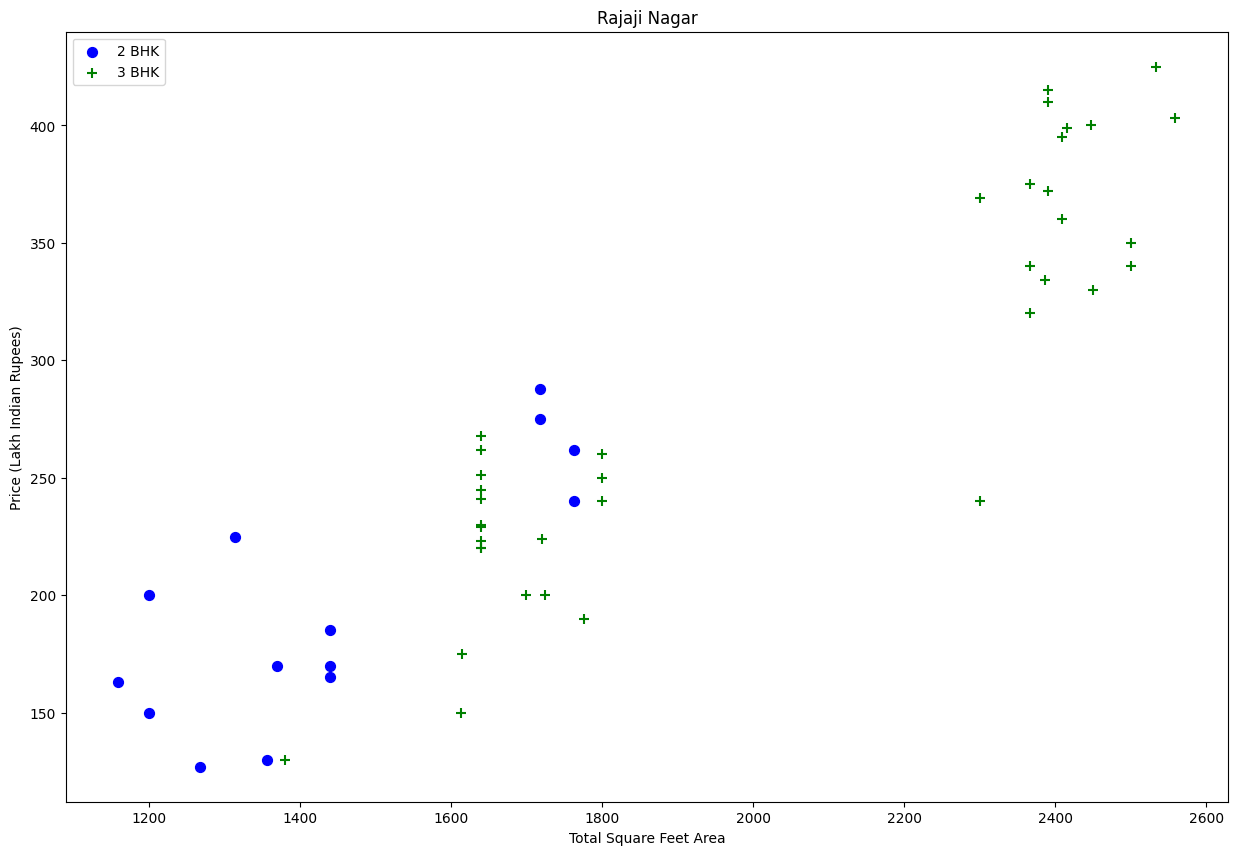

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib module

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10) # Use plt.rcParams instead of matplotlib.rcParams
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df4,"Rajaji Nagar")


In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape



(10299, 6)

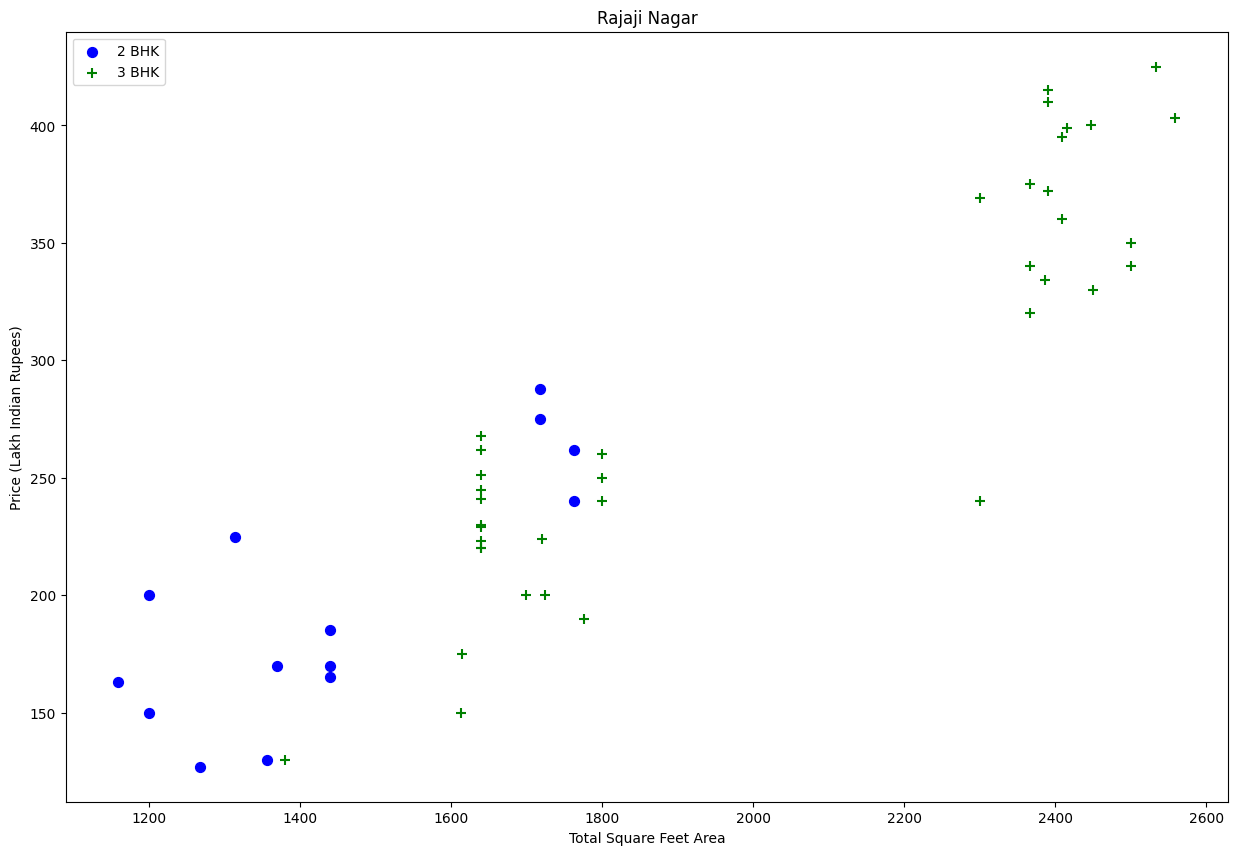

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib module

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10) # Use plt.rcParams instead of matplotlib.rcParams
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'Count')

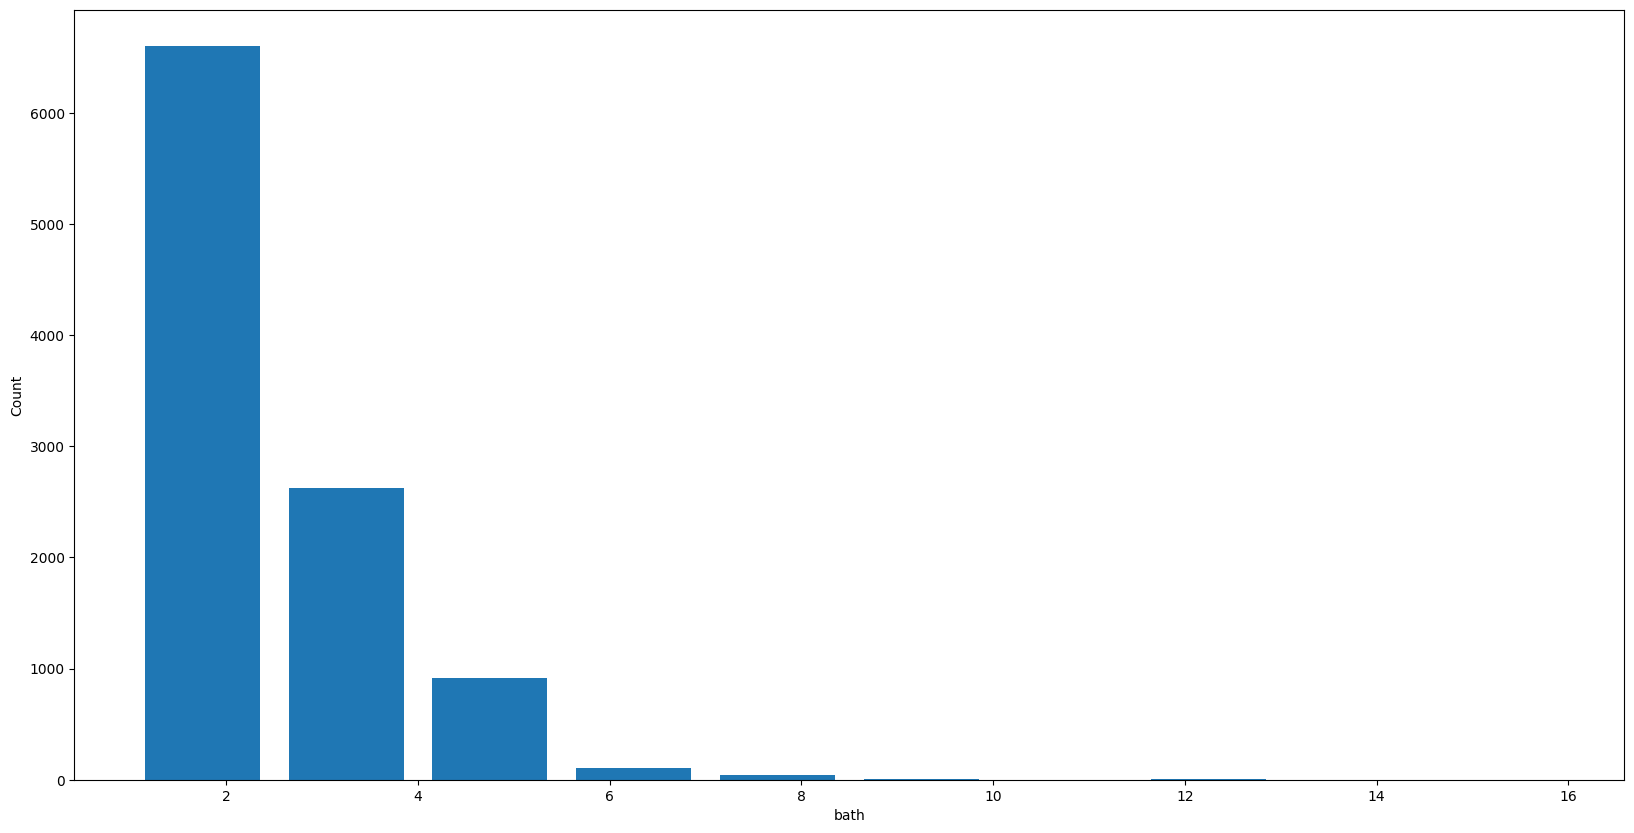

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("bath")
plt.ylabel("Count")
#

In [ ]:
df5[df5.bath>df5.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8467,other,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df6=df5[df5.bath<df5.bhk+2]
df6.shape

(10204, 6)

In [ ]:
dff=df6.drop(columns=['price_per_sqft'])
dff.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


One Hot Encoding

In [ ]:
dummies=pd.get_dummies(dff.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dff1 = pd.concat([dff,dummies.drop('other',axis='columns')],axis='columns')
dff1.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dff2 = dff1.drop('location',axis='columns')
dff2.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X=dff2.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y=dff2.price
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7881582790724727

k fold cross validation

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79955776, 0.79104804, 0.7981541 , 0.81897189, 0.81378695])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # The 'normalize' parameter is no longer supported in LinearRegression
                # Removing it to fix the error
                # 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        # The variable 'X' was not defined, changing it to 'x' to match the function parameter
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.804304,{}
1,lasso,0.682962,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.617275,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
def predict_price(location,sqft,bath,bhk):
    # Access the global x variable
    loc_index = np.where(X.columns==location)[0][0]

    x= np.zeros(len(X.columns)) # Create a new array for prediction, don't overwrite x
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]  # Use x_pred for prediction

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

np.float64(92.28126004501603)

In [ ]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

np.float64(91.10927685822082)

In [ ]:
predict_price('Indira Nagar',1000, 2, 2)

np.float64(173.34551423883087)

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))